# **I. Analytic Libraries**

**Importing the Libraries**

In [1]:
# Analysis tools
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [2]:
# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

In [3]:
# Machine Learning Classification tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# **II. Dataset**

**1. Loading the Dataset**

Loading the datset into a dataframe

In [4]:
data=pd.read_csv("./dataset.csv")

**2. Data Exploration**

Exploring the dataset and variables for better understanding

In [5]:
# First five rows
data.head()

,Name,Age,Gender,Race,SideEffects
0,Dakota Soto,62,M,Hawaiian,Headache
1,Rachael Rubio,69,F,Black,Yellow Skin
2,Heather Giles,47,M,White,Vomiting
3,Russell Malone,82,M,Black,Allergic Reaction
4,Tina Quinn,76,M,Hawaiian,Headache


In [6]:
# Last five rows
data.tail()

,Name,Age,Gender,Race,SideEffects
399995,Aaron Frey,77,F,American,Allergic Reaction
399996,Zoe Garcia,66,M,White,Stomach Ache
399997,Roger Berry,29,F,Asian,Diarrhoea
399998,Charles Espinoza,81,F,Hawaiian,Diarrhoea
399999,Jean Swanson,-22,F,American,Vomiting


In [7]:
# Columns
data.columns

Index(['Name', 'Age', 'Gender', 'Race', 'SideEffects'], dtype='object')

In [8]:
# Rows and columns
data.shape

(400000, 5)

In [9]:
# Datatypes
data.dtypes

Name           object
Age             int64
Gender         object
Race           object
SideEffects    object
dtype: object

In [10]:
# More information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         400000 non-null  object
 1   Age          400000 non-null  int64 
 2   Gender       399988 non-null  object
 3   Race         399965 non-null  object
 4   SideEffects  399923 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


Observation: Datatypes of 'Gender', 'Race' and 'SideEffects' contains null and need to be processed

In [11]:
# Null value count
data.isnull().sum()

Name            0
Age             0
Gender         12
Race           35
SideEffects    77
dtype: int64

Observation: 'Gender', 'Race' and 'SideEffects' contains missing data

In [12]:
# Unique value count
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 399988 

Age : 86 

Gender : 2 

Race : 6 

SideEffects : 9 



Observation: 'Gender' has 2, 'Race' has 6 and 'SideEffects' has 9 categories

# **III. Data Preprocessing**

Cleaning irrelevant data, missing data, data with inconsistent datatypes etc

**1. Handling Duplicates**

In [13]:
# Show duplicate rows
data.duplicated().sum()

12

In [14]:
# Remove duplicates
data = data.drop_duplicates()

**2. Handling Whitespaces**

In [15]:
# Handling instances with whitespaces
for i in data:
    data[i]=np.where(data[i]==" ",np.NAN,data[i])

**3. Handling Missing values**

In [16]:
# Null value count
data.isnull().sum()

Name            0
Age             0
Gender         12
Race           35
SideEffects    77
dtype: int64

Null Value count: This bar plot shows the null value count of each feature.

Text(0.5, 1.0, 'Total Missing Value ')

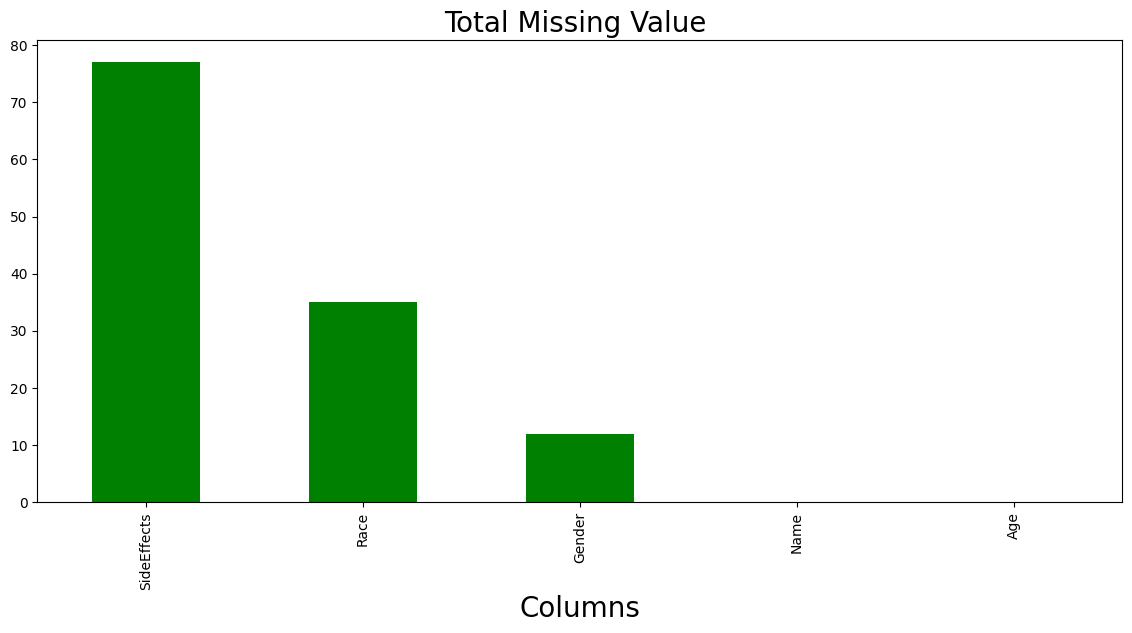

In [17]:
percent = (data.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='Green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

Observation: 'Age', 'Gender', 'SideEffects' have missing data

In [18]:
# Removing rows with null data
data=data.dropna(axis=0)

In [19]:
# Null value count
data.isnull().sum()

Name           0
Age            0
Gender         0
Race           0
SideEffects    0
dtype: int64

**4. Handling invalid data**

In [20]:
# Check invalid ages
invalid_age_count = (data['Age'] < 18).sum()
print('Count of invalid ages : ', invalid_age_count)

Count of invalid ages :  25


In [21]:
# Remove invalid age data
data = data.loc[(data['Age'] >= 18) & (data['Age'] <= 90)]

In [22]:
print(data.groupby('SideEffects').size())

SideEffects
Allergic Reaction    71789
Diarrhoea            26906
Dizziness            20117
Headache             76000
Joint/Muscle Pain    42106
Nausea               36711
Stomach Ache         50825
Vomiting             36515
Yellow Skin          38917
dtype: int64


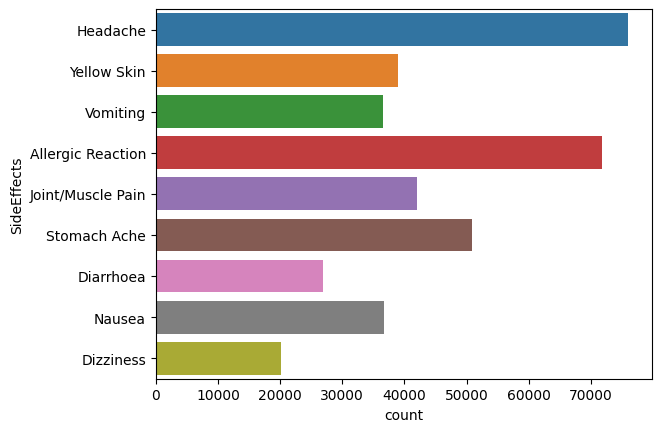

In [23]:
sns.countplot(data = data, y = 'SideEffects')
plt.show()

**5. Adding Data Labels**

In [24]:
#gender
genders = ['M', 'F']

# races
races = ['White', 'Hispanic', 'Black', 'Asian', 'American', 'Hawaiian']

# side effects
sideeffects = ['Dizziness','Headache','Nausea','Vomiting','Diarrhoea',
               'Stomach Ache','Yellow Skin','Allergic Reaction', 'Joint/Muscle Pain']

In [25]:
# Add Gender, Race and Side Effects Label Columns

data['Gender_Label'] = data.apply(lambda row: genders.index(row.Gender)+1, axis = 1)
data['Race_Label'] = data.apply(lambda row: races.index(row.Race)+1, axis = 1)
data['SideEffects_Label'] = data.apply(lambda row: sideeffects.index(row.SideEffects)+1, axis = 1)


In [26]:
data.head()

,Name,Age,Gender,Race,SideEffects,Gender_Label,Race_Label,SideEffects_Label
0,Dakota Soto,62.0,M,Hawaiian,Headache,1,6,2
1,Rachael Rubio,69.0,F,Black,Yellow Skin,2,3,7
2,Heather Giles,47.0,M,White,Vomiting,1,1,4
3,Russell Malone,82.0,M,Black,Allergic Reaction,1,3,8
4,Tina Quinn,76.0,M,Hawaiian,Headache,1,6,2


In [27]:
# Resetting index
data.reset_index(drop=True, inplace=True)

In [28]:
data.shape

(399886, 8)

# **IV. Analysis**

**1. Prepare Train and Test Data**

In [31]:
feature_names = ['Age', 'Gender_Label', 'Race_Label']
X = data[feature_names]
y = data['SideEffects_Label']

In [32]:
# Create Training and Test Sets and Apply Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2. Analyse Classifiers**

**2.1 Logistic Regression**

In [33]:
# Classifier: Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting results using Test data set
pred = logreg.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of Logistic regression classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.34      0.38      0.36      4037
           2       0.26      0.52      0.34     15188
           3       0.00      0.00      0.00      7540
           4       0.00      0.00      0.00      7277
           5       0.35      0.69      0.46      5297
           6       0.00      0.00      0.00     10136
           7       0.01      0.00      0.01      7824
           8       0.27      0.48      0.35     14320
           9       0.09      0.06      0.07      8359

    accuracy                           0.26     79978
   macro avg       0.15      0.24      0.18     79978
weighted avg       0.15      0.26      0.18     79978

Accuracy of Logistic regression classifier on test set: 0.258033


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**2.2 Naïve Bayes**

In [34]:
# Classifier: Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting results using Test data set
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of GNB classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.30      0.61      0.40      4037
           2       0.23      0.41      0.30     15188
           3       0.01      0.00      0.00      7540
           4       0.01      0.00      0.00      7277
           5       0.31      0.90      0.47      5297
           6       0.00      0.00      0.00     10136
           7       0.56      0.17      0.26      7824
           8       0.30      0.46      0.36     14320
           9       0.01      0.00      0.00      8359

    accuracy                           0.27     79978
   macro avg       0.19      0.28      0.20     79978
weighted avg       0.19      0.27      0.20     79978

Accuracy of GNB classifier on test set: 0.268036


**2.3 Stochastic Gradient Descent**

In [35]:
# Classifier: Stochastic Gradient Descent
sdg = SGDClassifier()
sdg.fit(X_train, y_train)

# Predicting results using Test data set
pred = sdg.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4037
           2       0.00      0.00      0.00     15188
           3       0.16      0.22      0.19      7540
           4       0.39      0.51      0.44      7277
           5       0.00      0.00      0.00      5297
           6       0.00      0.00      0.00     10136
           7       0.47      0.33      0.39      7824
           8       0.19      0.74      0.31     14320
           9       0.00      0.00      0.00      8359

    accuracy                           0.23     79978
   macro avg       0.14      0.20      0.15     79978
weighted avg       0.13      0.23      0.15     79978

Accuracy of Stochastic Gradient Descent classifier on test set: 0.231439


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**2.4 K-Nearest Neighbours**

In [36]:
# Classifier: K-Nearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting results using Test data set
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of K-NN classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.93      0.84      0.89      4037
           2       0.93      0.96      0.95     15188
           3       0.92      0.92      0.92      7540
           4       0.93      0.92      0.92      7277
           5       0.93      0.89      0.91      5297
           6       0.93      0.94      0.94     10136
           7       0.93      0.91      0.92      7824
           8       0.93      0.96      0.95     14320
           9       0.93      0.93      0.93      8359

    accuracy                           0.93     79978
   macro avg       0.93      0.92      0.92     79978
weighted avg       0.93      0.93      0.93     79978

Accuracy of K-NN classifier on test set: 0.931919


**2.5 Decision Tree**

In [37]:
# Classifier: Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicting results using Test data set
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of Decision Tree classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.93      0.84      0.89      4037
           2       0.93      0.96      0.95     15188
           3       0.94      0.92      0.93      7540
           4       0.93      0.92      0.92      7277
           5       0.93      0.89      0.91      5297
           6       0.93      0.94      0.94     10136
           7       0.94      0.92      0.93      7824
           8       0.93      0.96      0.95     14320
           9       0.93      0.93      0.93      8359

    accuracy                           0.93     79978
   macro avg       0.93      0.92      0.93     79978
weighted avg       0.93      0.93      0.93     79978

Accuracy of Decision Tree classifier on test set: 0.933044


**2.6 Random Forest**

In [38]:
# Classifier: Random Forest
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)

# Predicting results using Test data set
pred = rfm.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of Random Forest classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.93      0.84      0.89      4037
           2       0.93      0.96      0.95     15188
           3       0.94      0.92      0.93      7540
           4       0.93      0.92      0.92      7277
           5       0.93      0.89      0.91      5297
           6       0.93      0.94      0.94     10136
           7       0.94      0.92      0.93      7824
           8       0.93      0.96      0.95     14320
           9       0.93      0.93      0.93      8359

    accuracy                           0.93     79978
   macro avg       0.93      0.92      0.93     79978
weighted avg       0.93      0.93      0.93     79978

Accuracy of Random Forest classifier on test set: 0.933044


**2.7 Support Vector Machine**

In [39]:
# Classifier: Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

# Predicting results using Test data set
pred = svm.predict(X_test)
print(classification_report(y_test, pred))
score = accuracy_score(pred,y_test)
print('Accuracy of SVM classifier on test set: {:.6f}'.format(score))

              precision    recall  f1-score   support

           1       0.93      0.84      0.89      4037
           2       0.93      0.96      0.95     15188
           3       0.94      0.87      0.90      7540
           4       0.89      0.92      0.90      7277
           5       0.93      0.89      0.91      5297
           6       0.93      0.93      0.93     10136
           7       0.94      0.92      0.93      7824
           8       0.90      0.95      0.93     14320
           9       0.93      0.93      0.93      8359

    accuracy                           0.92     79978
   macro avg       0.92      0.91      0.92     79978
weighted avg       0.92      0.92      0.92     79978

Accuracy of SVM classifier on test set: 0.923404


# **V. Conclusion**

**Comparison Matrix**

* **Accuracy: (True Positive + True Negative) / Total Population**
 - Accuracy is a ratio of correctly predicted observation to the total observations. Accuracy is the most intuitive performance measure.
 - True Positive: The number of correct predictions that the occurrence is positive
 - True Negative: The number of correct predictions that the occurrence is negative
 
* **F1-Score: (2 x Precision x Recall) / (Precision + Recall)**
 - F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account. F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.
 - Precision: How often is the prediction correct When a positive value is predicted
 - Recall: How often is the prediction correct When the actual value is positive

<table align='left'>
<tbody>
<tr>
<td width="180"><strong>Classification Algorithms</strong></td>
<td width="150"><strong>Accuracy</strong></td>
<td width="150"><strong>F1-Score</strong></td>
</tr>
<tr>
<td width="180">Logistic Regression</td>
<td width="150">0.258033</td>
<td width="150">0.26</td>
</tr>
<tr>
<td width="180">Naïve Bayes</td>
<td width="150">0.268036</td>
<td width="150">0.27</td>
</tr>
<tr>
<td width="180">Stochastic Gradient Descent</td>
<td width="150">0.231439</td>
<td width="150">0.23</td>
</tr>
<tr>
<td width="150">K-Nearest Neighbours</td>
<td width="150">0.931919</td>
<td width="150">0.93</td>
</tr>
<tr>
<td width="180">Decision Tree</td>
<td width="150">0.933044</td>
<td width="150">0.93</td>
</tr>
<tr>
<td width="180">Random Forest</td>
<td width="150">0.933044</td>
<td width="150">0.93</td>
</tr>
<tr>
<td width="180">Support Vector Machine</td>
<td width="150">0.923404</td>
<td width="150">0.92</td>
</tr>
</tbody>
</table>

**We can see from our test that Decision Tree and Random Forest are the most accurate models to predict side effects based on age, gender and race.**